In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
sns.set(font_scale=1.3, style='ticks')


In [40]:
#Specify number of folds and model/results folders

num_folds = 4
train_dir = '/home/drk/seqnn/data/models/v2'

#Padding for drawing text annotations within plots
eps = 0.05


In [49]:
#Read target descriptions

fold0_acc_file = '%s/f0c0/testg-0/acc.txt' % (train_dir)
fold0_acc_df = pd.read_csv(fold0_acc_file, sep='\t', index_col=0).reset_index(drop=True)

#Get experimental assay types
descriptions = fold0_acc_df.description
experiments = pd.Series([desc.split(':')[0] for desc in descriptions])
experiments.value_counts()


RNA    955
dtype: int64

In [50]:
#Get a mask of RNA-only targets
rna_mask = (experiments=='RNA')


In [51]:
#Read test set accuracies

fold_pearsonr = []
fold_npearsonr = []

#Loop over folds
for fi in range(num_folds):
    fold_acc_file = '%s/f%dc0/testg_no_unclip_rna_fix-0/acc.txt' % (train_dir,fi)
    fold_acc_df = pd.read_csv(fold_acc_file, sep='\t', index_col=0)
    
    #Store gene-level accuracy
    fold_pearsonr.append(fold_acc_df.pearsonr)
    
    #Store mean-subtracted, quantile-normalized accuracy
    fold_npearsonr.append(fold_acc_df.pearsonr_norm)

fold_pearsonr = np.array(fold_pearsonr)
fold_npearsonr = np.array(fold_npearsonr)

#Average across folds
mean_pearsonr = fold_pearsonr.mean(axis=0)
mean_npearsonr = fold_npearsonr.mean(axis=0)


## RNA

In [54]:
#Check outliers
len(np.nonzero(mean_pearsonr[rna_mask] < 0.80)[0])


6

In [55]:
#Check outliers
len(np.nonzero(mean_pearsonr[rna_mask] > 0.96)[0])


0

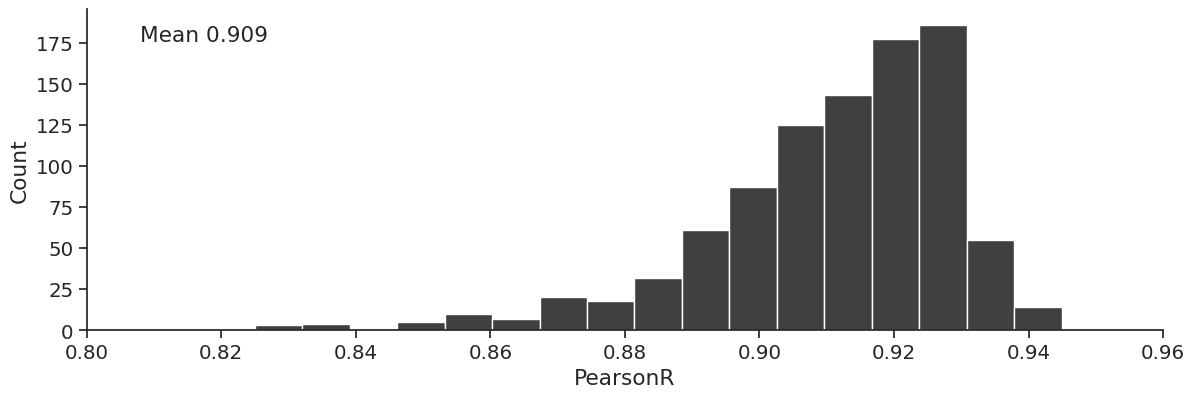

In [56]:
#Plot distribution of gene-level test set pearson correlations (average of 4 folds)
keep_index = np.nonzero((mean_pearsonr[rna_mask] >= 0.80) & (mean_pearsonr[rna_mask] <= 0.96))[0]

sns.displot(mean_pearsonr[rna_mask][keep_index], bins=20, aspect=3, height=4, color='black')
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_pearsonr[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)
plt.xlim(0.8, 0.96)

plt.savefig('genes_hist.pdf')


In [57]:
#Check outliers
len(np.nonzero(mean_npearsonr[rna_mask] < 0.35)[0])


2

In [58]:
#Check outliers
len(np.nonzero(mean_npearsonr[rna_mask] > 0.85)[0])


0

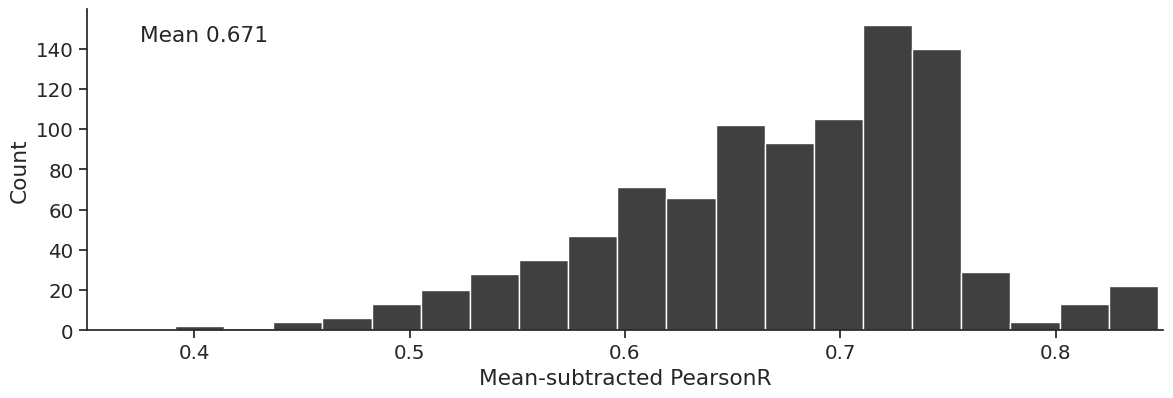

In [59]:
#Plot distribution of mean-subtracted, quantile-normalized gene-level test set pearson correlations (average of 4 folds)
keep_index = np.nonzero((mean_npearsonr[rna_mask] >= 0.35) & (mean_npearsonr[rna_mask] <= 0.85))[0]

sns.displot(mean_npearsonr[rna_mask][keep_index], bins=20, aspect=3, height=4, color='black')
plt.gca().set_xlabel('Mean-subtracted PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_npearsonr[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)
plt.xlim(0.35, 0.85)

plt.savefig('genes_nhist.pdf')
